In [1]:
import pandas as pd
import time, datetime, tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import utils, tools

/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_end["CAL-ID"] = selection_end["CAL-ID"].astype(int).astype(str)


Profile not saved.
Profile not saved.


/afs/cern.ch/work/j/jcapotor/software/rtd/pdhd/ana/tools.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_end["CAL-ID"] = selection_end["CAL-ID"].astype(int).astype(str)


<ErrorbarContainer object of 3 artists>

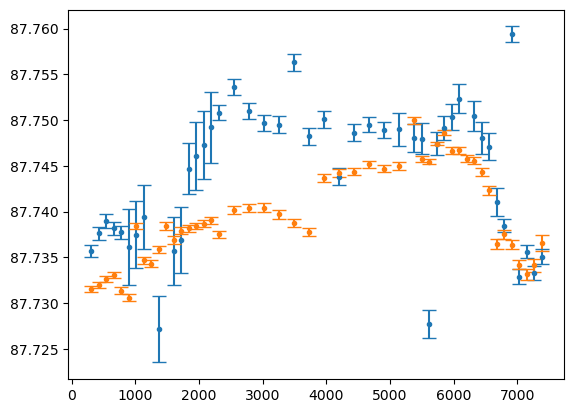

In [20]:
date_ini = datetime.datetime(2024, 5, 5, 7, 30, 0)
date_end = datetime.datetime(2024, 5, 5, 8, 30, 0)
result1 = tools.make_tgrad_profile(
    date_ini=date_ini,
    date_end=date_end,
    path_to_calib="/eos/user/j/jcapotor/RTDdata/calib/TGrad/LAR2023/lar2023_tree_method_avg_path.pkl",
    #save_path=f"/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Data/{date_ini}_{date_end}_REC-ON_HV-OFF_CE-OFF.csv"
)
plt.errorbar(result1["Y"].to_numpy(), result1["temp"].to_numpy(), yerr=result1["temp_err"].to_numpy(), fmt=".", capsize=5)
date_ini = datetime.datetime(2024, 5, 5, 7, 30, 0)
date_end = datetime.datetime(2024, 5, 5, 8, 30, 0)
result = tools.make_tgrad_profile(
    date_ini=date_ini,
    date_end=date_end,
    #path_to_calib="/eos/user/j/jcapotor/RTDdata/calib/TGrad/LAR2023/lar2023_tree_method_avg_path.pkl",
    #save_path=f"/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Data/{date_ini}_{date_end}_REC-ON_HV-OFF_CE-OFF.csv"
)
plt.errorbar(result["Y"].to_numpy(), result["temp"].to_numpy(), yerr=result["temp_err"].to_numpy(), fmt=".", capsize=5)

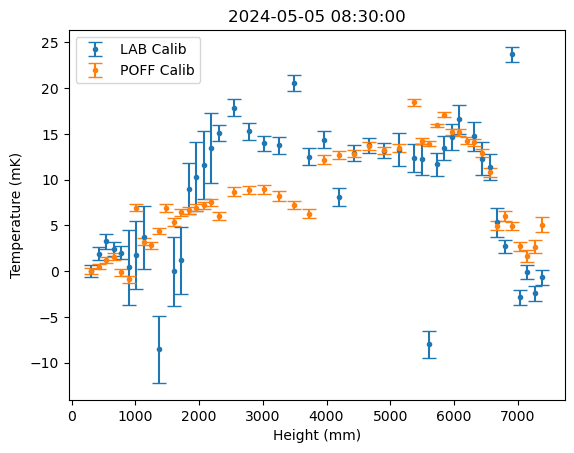

In [21]:
plt.errorbar(result1["Y"].to_numpy(),
             1e3*(result1["temp"]-result1.loc["39607"]["temp"]).to_numpy(), yerr=1e3*result1["temp_err"].to_numpy(), fmt=".", capsize=5, label="LAB Calib")
plt.errorbar(result["Y"].to_numpy(),
             1e3*(result["temp"]-result.loc["39607"]["temp"]).to_numpy(), yerr=1e3*result["temp_err"].to_numpy(), fmt=".", capsize=5, label="POFF Calib")

plt.xlabel("Height (mm)")
plt.ylabel("Temperature (mK)")
plt.title(fr"{date_end}")
plt.legend()
plt.savefig(f"/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Data/{date_ini}_{date_end}_ALL_ON.png", format="png")

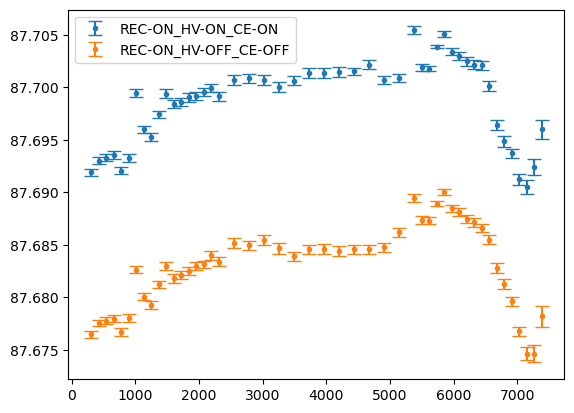

In [6]:
result1 = pd.read_csv("/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Data/2024-11-27 10:50:00_2024-11-27 11:50:00_REC-ON_HV-ON_CE-ON.csv", header=0)
result1 = result1.set_index("Unnamed: 0")
plt.errorbar(result1.index.to_numpy(), result1["temp"].to_numpy(), yerr=result1["temp_err"].to_numpy(), fmt=".", capsize=5, label="REC-ON_HV-ON_CE-ON")

result = pd.read_csv("/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Data/2024-12-02 10:50:00_2024-12-02 11:50:00_REC-ON_HV-OFF_CE-OFF.csv", header=0)
result = result.set_index("Unnamed: 0")
plt.errorbar(result.index.to_numpy(), result["temp"].to_numpy(), yerr=result["temp_err"].to_numpy(), fmt=".", capsize=5, label="REC-ON_HV-OFF_CE-OFF")

plt.legend()

<ErrorbarContainer object of 3 artists>

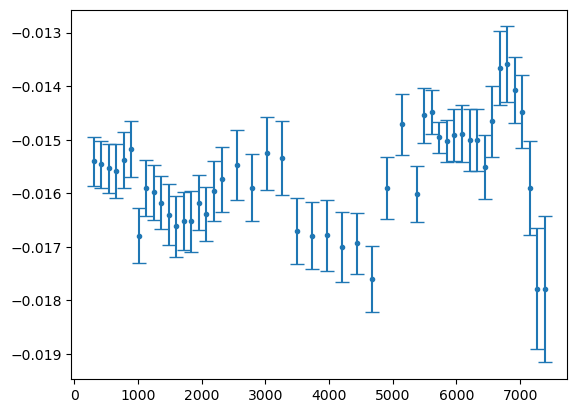

In [8]:
plt.errorbar(result.index.to_numpy(), (result["temp"] - result1["temp"]).to_numpy(),
             yerr=np.sqrt(result["temp_err"]**2 + result1["temp_err"]**2).to_numpy(), fmt=".", capsize=5)

In [31]:
tini, tend = datetime.datetime(2024, 11, 25, 8, 0, 0), datetime.datetime(2024, 12, 5, 8, 0, 0)
data, data_err = utils.load_data(tini, tend)

In [3]:
# calib = utils.load_calib(
#     path="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 14:25:00.pkl"
#     )["40525"]

# for index, row in tqdm.tqdm(data.iterrows(), total=len(data), desc="Processing data..."):
#     try:
#         mapping = utils.load_mapping(date=index)
#     except:
#         continue
#     tprofile, tprofile_err = {}, {}
#     fig, axes = plt.subplots(1,1)
#     for channel in row.index:
#         mapping_row = mapping.loc[(mapping["SC-ID"]==channel)]
#         system = mapping_row["SYSTEM"].values[0]
#         if system != "APA":
#             continue
#         try:
#             sensor_id = str(int(mapping_row["CAL-ID"].iloc[0]))
#         except:
#             continue
#         if sensor_id not in calib.index:
#             continue
#         tprofile[int(mapping_row["Y"].iloc[0])] = row[channel] - 1e-3*calib.loc[sensor_id]["cc"]
#         tprofile_err[int(mapping_row["Y"].iloc[0])] = (data_err.loc[index][channel] + 1e-3*calib.loc[sensor_id]["cc_err"])
#     try:
#         axes.errorbar(tprofile.keys(), 1e3*(np.array(list(tprofile.values())) - tprofile[305]), yerr=1e3*np.array(list(tprofile_err.values())), fmt=".", capsize=5)
#         axes.set_title(fr"{index}")
#         axes.set_ylim(-40, 40)
#         axes.set_ylabel("Temperature (mK)")
#         fig.savefig(fr"/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/second_poff/poff_2024-12-03 14:25:00_apa_profiles/{index}.pdf", format="pdf")
#         plt.close(fig)
#     except:
#         continue

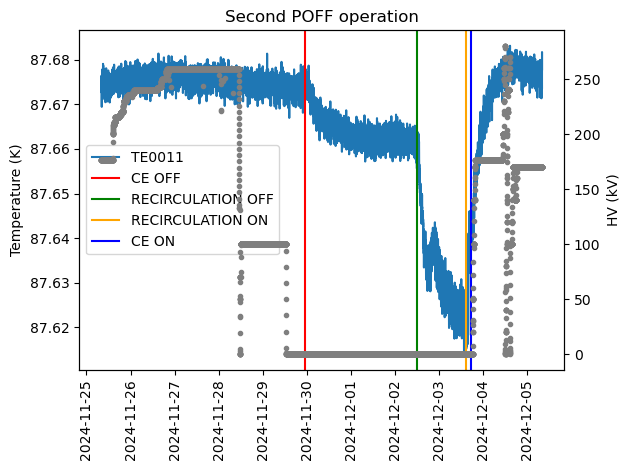

In [45]:
channel = "TE0011"
fig, axes = plt.subplots(1,1)
plt.xticks(rotation=90)
plt.title("Second POFF operation")
axes2 = axes.twinx()

conditions = (data[channel]<90)&(data[channel]>86)

axes.plot(data.loc[conditions].index.to_numpy(), data.loc[conditions][channel].to_numpy(), label=fr"{channel}")
axes.axvline(datetime.datetime(2024, 11, 29, 23, 0, 0), color="red", label="CE OFF")
axes.axvline(datetime.datetime(2024, 12, 2, 12, 0, 0), color="green", label="RECIRCULATION OFF")
axes.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), color="orange", label="RECIRCULATION ON")
axes.axvline(datetime.datetime(2024, 12, 3, 17, 32, 0), color="blue", label="CE ON")
axes.legend(loc="center left")
axes2.plot(data.index.to_numpy(), 1e-3*data["Heinz_VRaw"].to_numpy(), ".", color="tab:grey")
axes.set_ylabel("Temperature (K)")
axes2.set_ylabel("HV (kV)")
fig.tight_layout()
fig.savefig("/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/second_poff/tevolution.png", format="png")
# data["TE0001"].loc[(data["TE0001"]<90)&(data["TE0001"]>87)].plot()
# data["Heinz_VRaw"].plot()

Text(0, 0.5, 'Temperature (mK)')

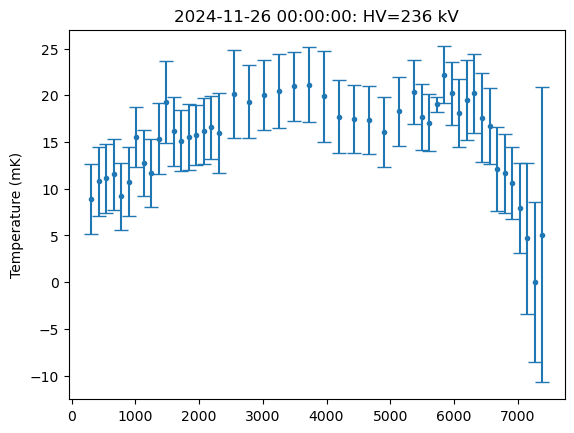

In [5]:
calib = utils.load_calib(
    path="/eos/user/j/jcapotor/RTDdata/calib/TGrad/POFF/poff_2024-12-03 13:25:00_2024-12-03 14:25:00.pkl"
    )["40525"]

date = datetime.datetime(2024, 11, 26, 0, 0, 0)
mapping = utils.load_mapping(date=date)

index = str(date)
row = data.loc[index]

tprofile = {}
fig, axes = plt.subplots(1,1)
for channel in row.index:
    mapping_row = mapping.loc[(mapping["SC-ID"]==channel)]
    system = mapping_row["SYSTEM"].values[0]
    if system != "TGRAD":
        continue
    try:
        sensor_id = str(int(mapping_row["CAL-ID"].iloc[0]))
    except:
        continue
    if sensor_id not in calib.index:
        continue
    tprofile[sensor_id] = {
        "temp":row[channel] - 1e-3*calib.loc[sensor_id]["cc"],
        "temp_err":(data_err.loc[index][channel] + 1e-3*calib.loc[sensor_id]["cc_err"]),
        "Y":mapping_row["Y"].iloc[0],
        "X":mapping_row["X"].iloc[0],
        "Z":mapping_row["Z"].iloc[0],
        "name":mapping_row["NAME"].iloc[0],
        }
tprofile = pd.DataFrame(tprofile).T
axes.errorbar(tprofile["Y"].to_numpy(), 1e3*(tprofile["temp"].to_numpy() - tprofile["temp"].iloc[1]), yerr=1e3*(tprofile["temp_err"]), fmt=".", capsize=5)
axes.set_title(fr"{index}: HV={1e-3*row['Heinz_VRaw']:.0f} kV")
#axes.set_ylim(-40, 40)
axes.set_ylabel("Temperature (mK)")
#fig.savefig(fr"/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/HV_analysis/{index}: HV={1e-3*row['Heinz_VRaw']:.0f} kV.pdf", format="pdf")
#plt.close(fig)

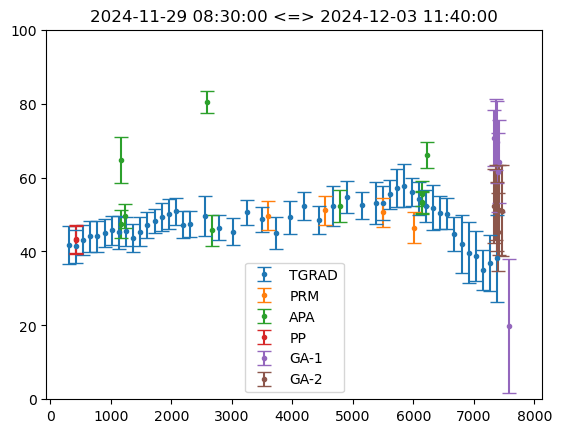

In [66]:

calib = utils.load_calib(
    path="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 14:25:00.pkl"
    )["40525"]

def calc_tprofile(date, syst="TGRAD"):
    mapping = utils.load_mapping(date=date)

    index = str(date)
    row = data.loc[index]

    tprofile = {}
    for channel in row.index:
        mapping_row = mapping.loc[(mapping["SC-ID"]==channel)]
        system = mapping_row["SYSTEM"].values[0]
        if system != syst:
            continue
        try:
            sensor_id = str(int(mapping_row["CAL-ID"].iloc[0]))
        except:
            continue
        if sensor_id not in calib.index:
            continue
        if row[channel] > 87.9:
            continue
        if "F" in mapping_row["NAME"].iloc[0]:
            continue
        tprofile[sensor_id] = {
            "temp":row[channel] - 1e-3*calib.loc[sensor_id]["cc"],
            "temp_err":(data_err.loc[index][channel] + 1e-3*calib.loc[sensor_id]["cc_err"]),
            "Y":mapping_row["Y"].iloc[0],
            "X":mapping_row["X"].iloc[0],
            "Z":mapping_row["Z"].iloc[0],
            "name":mapping_row["NAME"].iloc[0],
            }
    tprofile = pd.DataFrame(tprofile).T
    return tprofile

fig, axes = plt.subplots(1,1)
def plot_tprofile_diff(date1, date2, syst):
    tprofile1 = calc_tprofile(date=date1, syst=syst)
    tprofile2 = calc_tprofile(date=date2, syst=syst)
    axes.errorbar(tprofile1["Y"].to_numpy(),
              1e3*(tprofile1["temp"].to_numpy() - tprofile2["temp"].to_numpy()),
              yerr=1e3*np.sqrt((tprofile1["temp_err"].to_numpy().astype(float))**2 + (tprofile2["temp_err"].to_numpy().astype(float))**2),
              fmt=".", capsize=5, label=fr"{syst}"
              )
date1 = datetime.datetime(2024, 11, 29, 8, 30, 0)
date2 = datetime.datetime(2024, 12, 3, 11, 40, 0)

plot_tprofile_diff(date1, date2, syst="TGRAD")
plot_tprofile_diff(date1, date2, syst="PRM")
plot_tprofile_diff(date1, date2, syst="APA")
plot_tprofile_diff(date1, date2, syst="PP")
#plot_tprofile_diff(date1, date2, syst="PIPE")
#plot_tprofile_diff(date1, date2, syst="WALL")
plot_tprofile_diff(date1, date2, syst="GA-1")
plot_tprofile_diff(date1, date2, syst="GA-2")
plt.title(fr"{date1} <=> {date2}")
plt.ylim(0, 100)
plt.legend()


#fig.savefig(fr"/eos/user/j/jcapotor/DUNE-IFIC/Experiments/ProtoDUNE-HD/Operation/Plots/HV_analysis/{index}: HV={1e-3*row['Heinz_VRaw']:.0f} kV.pdf", format="pdf")
#plt.close(fig)

In [17]:
calib = utils.load_calib(
    path="/eos/user/j/jcapotor/RTDdata/calib/all/poff_2024-12-03 14:25:00.pkl"
    )["40525"]

gradient = {}
data, data_err = utils.load_data(tini=datetime.datetime(2024, 11, 25, 0, 0, 0), tend=datetime.datetime(2024, 12, 5, 0, 0, 0))
for index, row in tqdm.tqdm(data.iterrows(), total=len(data), desc="Processing data..."):
    if index < datetime.datetime(2024, 11, 29, 0, 0, 0):
        continue
    try:
        mapping = utils.load_mapping(date=index)
    except:
        continue
    tprofile, tprofile_err = {}, {}
    for channel in row.index:
        mapping_row = mapping.loc[(mapping["SC-ID"]==channel)]
        system = mapping_row["SYSTEM"].values[0]
        if system != "TGRAD":
            continue
        try:
            sensor_id = str(int(mapping_row["CAL-ID"].iloc[0]))
        except:
            continue
        if sensor_id not in calib.index:
            continue
        tprofile[sensor_id] = {
            "temp":row[channel] - 1e-3*calib.loc[sensor_id]["cc"],
            "temp_err":(data_err.loc[index][channel] + 1e-3*calib.loc[sensor_id]["cc_err"]),
            "Y":mapping_row["Y"].iloc[0],
            "X":mapping_row["X"].iloc[0],
            "Z":mapping_row["Z"].iloc[0],
            "name":mapping_row["NAME"].iloc[0],
            }
    tprofile = pd.DataFrame(tprofile).T
    bottom = tprofile.loc[(tprofile["Y"]< 600)]
    middle = tprofile.loc[(tprofile["Y"]>3500)&(tprofile["Y"]<5000)]
    top = tprofile.loc[(tprofile["Y"]>6200)]
    gradient[index] = {
        "mb":(middle["temp"].mean() - bottom["temp"].mean()),
        "mt":(middle["temp"].mean() - top["temp"].mean()),
        "tb":(top["temp"].mean() - bottom["temp"].mean())
    }

Processing data...: 100%|██████████| 14399/14399 [05:22<00:00, 44.71it/s]  


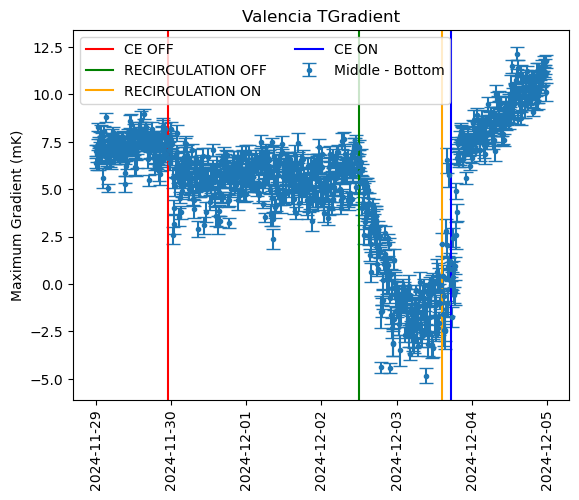

In [19]:
grad = pd.DataFrame(gradient).T
plt.errorbar(grad.resample("10min").mean().index.to_numpy(),
         1e3*grad.resample("10min").mean()["mb"].to_numpy(),
         yerr=1e3*grad.resample("10min").sem()["mb"].to_numpy(),
         fmt=".", capsize=5, label="Middle - Bottom")

# plt.errorbar(grad.resample("10min").mean().index.to_numpy(),
#          1e3*grad.resample("10min").mean()["mt"].to_numpy(),
#          yerr=1e3*grad.resample("10min").sem()["mt"].to_numpy(),
#          fmt=".", capsize=5, label="Middle - Top")

# plt.errorbar(grad.resample("10min").mean().index.to_numpy(),
#          1e3*grad.resample("10min").mean()["tb"].to_numpy(),
#          yerr=1e3*grad.resample("10min").sem()["tb"].to_numpy(),
#          fmt=".", capsize=5, label="Top - Bottom")
plt.axvline(datetime.datetime(2024, 11, 29, 23, 0, 0), color="red", label="CE OFF")
plt.axvline(datetime.datetime(2024, 12, 2, 12, 0, 0), color="green", label="RECIRCULATION OFF")
plt.axvline(datetime.datetime(2024, 12, 3, 14, 30, 0), color="orange", label="RECIRCULATION ON")
plt.axvline(datetime.datetime(2024, 12, 3, 17, 32, 0), color="blue", label="CE ON")
plt.xticks(rotation=90);
plt.ylabel("Maximum Gradient (mK)")
plt.title("Valencia TGradient")
plt.legend(loc="best", ncol=2)
#plt.ylim(10, 30)
#plt.xlim(datetime.datetime(2024, 4, 30, 8, 0, 0), datetime.datetime(2024, 5, 5, 12, 0, 0))